In [84]:
# Library imports
import random

import torch
from torchvision import datasets
from torchvision import transforms

from skimage.color import rgb2lab, lab2rgb
import numpy as np
import matplotlib.pyplot as plt

In [153]:
# Settings
NET_IMG_SIZE = 512

# Hyperparameters
LEARNING_RATE = 1e-3

In [128]:
# Download the Pascal VOC2012 datasets
# For now, we'll use the 'train' image subset as training data and 'val' as the testing set.
# TODO: Create a custom Dataset class for the actual testing set since that one is not available in torchvision
training_data = datasets.VOCDetection('data', year='2012', image_set='train', download=True)
test_data = datasets.VOCDetection('data', year='2012', image_set='val', download=True)

print(f'Training dataset size = {len(training_data)}')
print(f'Testing dataset size = {len(test_data)}')

Using downloaded and verified file: data\VOCtrainval_11-May-2012.tar
Extracting data\VOCtrainval_11-May-2012.tar to data
Using downloaded and verified file: data\VOCtrainval_11-May-2012.tar
Extracting data\VOCtrainval_11-May-2012.tar to data
Training dataset size = 5717
Testing dataset size = 5823


In [74]:
"""
Takes a PIL Image in RGB mode, resizes it to the globally defined NET_IMG_SIZE and transfers it to CIELab color space.
Returns a tuple with two tensors, one for the L channel and one for the a and b channels together.

"""
def preprocess_image(img):
    resize_transform = transforms.Resize((NET_IMG_SIZE, NET_IMG_SIZE))

    img = resize_transform(img)
    img = np.array(img)
    img_lab = rgb2lab(img).astype("float32") # Convert RGB to Lab color space
    img_lab = transforms.ToTensor()(img_lab)

    L = img_lab[[0], ...] / 50. - 1. # Values between -1 and 1
    ab = img_lab[[1,2], ...] / 110. # Values between -1 and 1

    return L, ab

sample = <PIL.Image.Image image mode=RGB size=483x500 at 0x1C1687D9DF0>
label = {'annotation': {'folder': 'VOC2012', 'filename': '2008_000066.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '483', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'dog', 'pose': 'Frontal', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '1', 'ymin': '9', 'xmax': '439', 'ymax': '500'}, 'difficult': '0'}]}}
X.size() = torch.Size([1, 512, 512])
Y.size() = torch.Size([2, 512, 512])


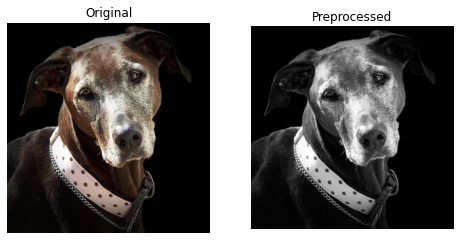

In [154]:
# Sample code to visualize the preprocessed version of random images in the training set
sample, label = training_data[random.randint(0, len(training_data))]
print(f'sample = {sample}')
print(f'label = {label}')

# Apply pre-processing to image, ideally we should call this as a Lambda transformer for the training dataset
X, Y = preprocess_image(sample)
print(f'X.size() = {X.size()}')
print(f'Y.size() = {Y.size()}')

# Convert from 1xHxW array to HxW
new_L = X[0, :, :]

# Display our images using pyplot
fig = plt.figure(figsize=(8,8))

fig.add_subplot(1,2, 1)
plt.title('Original')
plt.axis("off")
plt.imshow(sample) # Here we're showing the original RGB PIL Image, I'm not sure how to display L*a*b yet.

fig.add_subplot(1,2, 2)
plt.title('Preprocessed')
plt.axis("off")
plt.imshow(new_L, cmap='gray', vmin=-1, vmax=1)

plt.show()
